In [1]:
%matplotlib inline

import os
import json
import numpy as np
from alignedpitchfilter import alignedpitchfilter
import matplotlib.pyplot as plt
import copy


In [2]:
examplefolder = 'ussak--sazsemaisi--aksaksemai----dede_salih_efendi'
pitchfile = os.path.join(examplefolder, 'pitch.json')
alignednotefile = os.path.join(examplefolder, 'alignedNotes.json')

savepitchfile = os.path.join(examplefolder, 'pitch_corrected.json')
savenotefile = os.path.join(examplefolder, 'alignedNotes_corrected.json')
                   

In [3]:
# load the data
pitch = np.array(json.load(open(pitchfile, 'r')))
notes = json.load(open(alignednotefile, 'r'))


In [4]:
pitch_corrected, synth_pitch, notes_corrected = alignedpitchfilter.correctOctaveErrors(pitch, notes['notes'])

json.dump(pitch_corrected.tolist(), open(savepitchfile, 'w'))
json.dump({'notes': notes_corrected}, open(savenotefile, 'w'))


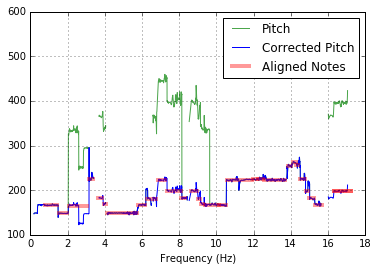

In [5]:
# remove zeros for plotting
pitch_plot = copy.deepcopy(pitch)
pitch_plot[pitch_plot[:,1]==0,:] = np.NAN

pitch_corrected_plot = copy.deepcopy(pitch_corrected)
pitch_corrected_plot[pitch_corrected_plot[:,1]==0,:] = np.NAN

fig, ax = plt.subplots()

# plot pitch tracks
ax.plot(pitch_plot[:,0], pitch_plot[:,1], 'g', label='Pitch', alpha = 0.7)
ax.plot(pitch_corrected_plot[:,0], pitch_corrected_plot[:,1], 'b', label=u'Corrected Pitch')

plt.xlabel('Time (sec)')
plt.xlabel('Frequency (Hz)')

plt.grid(True)

# plot notes
for note in notes_corrected:
    ax.plot(note['Interval'], [note['PerformedPitch']['Value'], note['PerformedPitch']['Value']], 
            'r', alpha=0.4, linewidth=4) 
ax.plot(note['Interval'], [note['PerformedPitch']['Value'], note['PerformedPitch']['Value']], 
        'r', label=u'Aligned Notes',alpha=0.4, linewidth=4)  # dummy replot for labeling
ax.set_ylim([100, 600])

legend = ax.legend(loc='upper right') 
    
plt.show()
